## Install dependencies

In [ ]:
%pip install numpy cython
%pip install wheel
%pip install ir_datasets
%pip install scikit-learn
%pip install nltk
%pip install requests
%pip install matplotlib
%pip install pandas

# Importar dados para avaliação

In [9]:
import json

f = open('sira_trec_covid_ndcg.json')
sira_ndcg = json.load(f)
f = open('sira_trec_covid_fscore.json')
sira_f_score = json.load(f)

f = open('els_trec_covid_ndcg.json')
els_ndcg = json.load(f)
f = open('els_trec_covid_fscore.json')
els_f_score = json.load(f)

In [43]:
import numpy as np

def get_ids(query_ids):
    qids = []
    for key in query_ids:
        qids.append(query_ids[key])

    return qids

def get_recall_data(f_score):
    datas = []
    for key in f_score["recall"]:
        datas.append(f_score["recall"][key])

    return list(np.around(np.array(datas)*100,3))

def get_precision_data(f_score):
    datas = []
    for key in f_score["precision"]:
        datas.append(f_score["precision"][key])

    return list(np.around(np.array(datas),3))

def get_f_scores_data(f_score):
    datas = []
    for key in f_score["f_scores"]:
        datas.append(f_score["f_scores"][key])

    return list(np.around(np.array(datas)*100,3))

def get_dcg_data(dcg_score):
    datas = []
    for key in dcg_score["dcg"]:
        datas.append(dcg_score["dcg"][key])

    return list(np.around(np.array(datas),3))

def get_ndcg_data(dcg_score):
    datas = []
    for key in dcg_score["ndcg"]:
        datas.append(dcg_score["ndcg"][key])

    return list(np.around(np.array(datas),3))

def greate_values(a, b):
    values = []
    positions = []

    for i in range(len(a)):
        if a[i] > b[i]:
            values.append(a[i])
            positions.append(i+1)
    
    # values
    return positions

def calculate_average_value(numbers):
    if not numbers:  # Check if the list is empty
        return None
    return sum(numbers) / len(numbers)

## Avaliação de recall

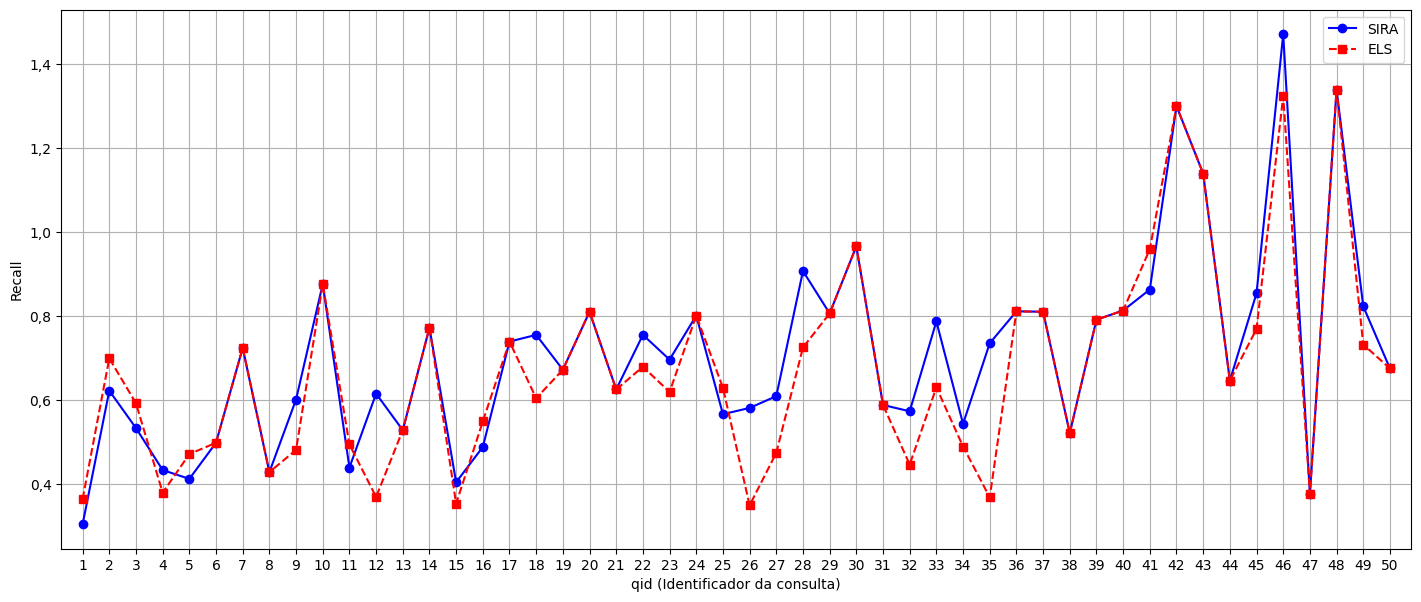

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sira = get_recall_data(sira_f_score)
els = get_recall_data(els_f_score)
list_qid = get_ids(sira_f_score["query_ids"])

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(sira, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

# Formatar o eixo y para usar vírgulas como separador decimal
fmt = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x).replace('.',','))
ax.yaxis.set_major_formatter(fmt)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('Recall')
ax.legend()
ax.grid(True)
# plt.show()

# Adjust x limits
ax.set_xlim(x_stick[0] - 0.8, x_stick[-1] + 0.8)  # Adjust these numbers according to your preference

# Adjust margins
plt.subplots_adjust(left=0.05, right=0.95)  # Adjust these numbers according to your preference

plt.savefig("pdf/trec_covid_recall.pdf", format="pdf")

## Avaliação da precisão

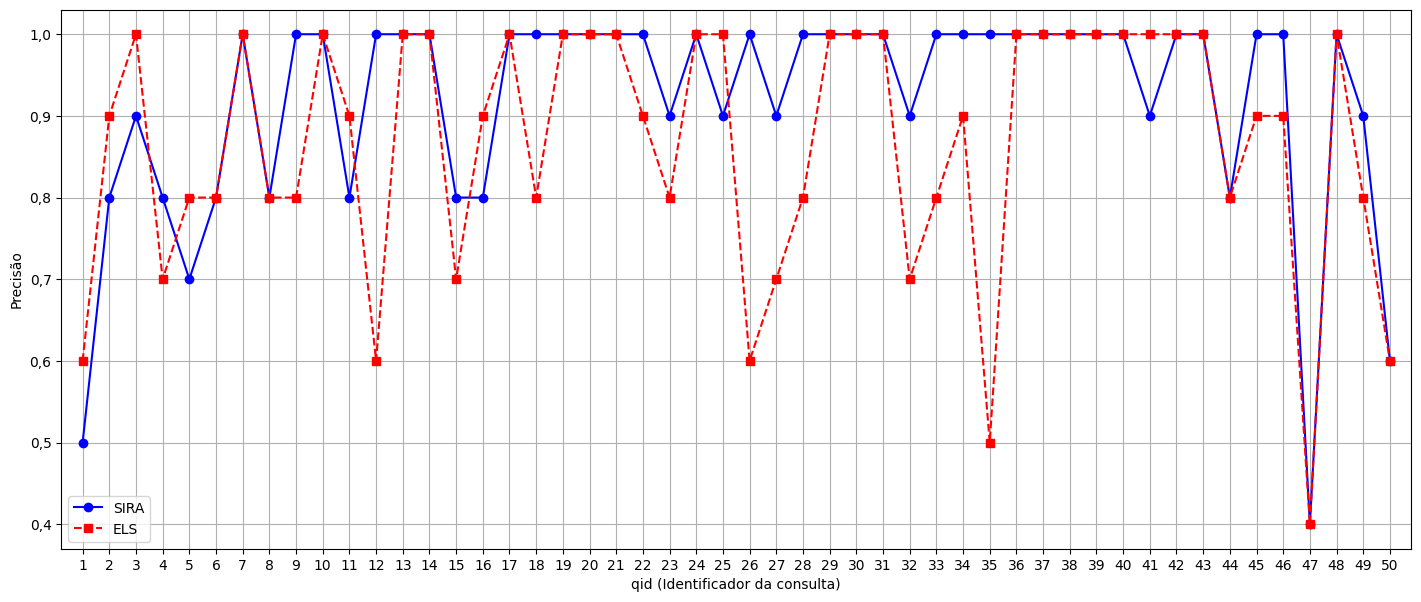

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nir = get_precision_data(sira_f_score)
els = get_precision_data(els_f_score)
list_qid = get_ids(sira_f_score["query_ids"])

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

# Formatar o eixo y para usar vírgulas como separador decimal
fmt = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x).replace('.',','))
ax.yaxis.set_major_formatter(fmt)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('Precisão')
ax.legend()
ax.grid(True)
# plt.show()

# Adjust x limits
ax.set_xlim(x_stick[0] - 0.8, x_stick[-1] + 0.8)  # Adjust these numbers according to your preference

# Adjust margins
plt.subplots_adjust(left=0.05, right=0.95)  # Adjust these numbers according to your preference

plt.savefig("pdf/trec_covid_precision.pdf", format="pdf")

## Avaliação de F1

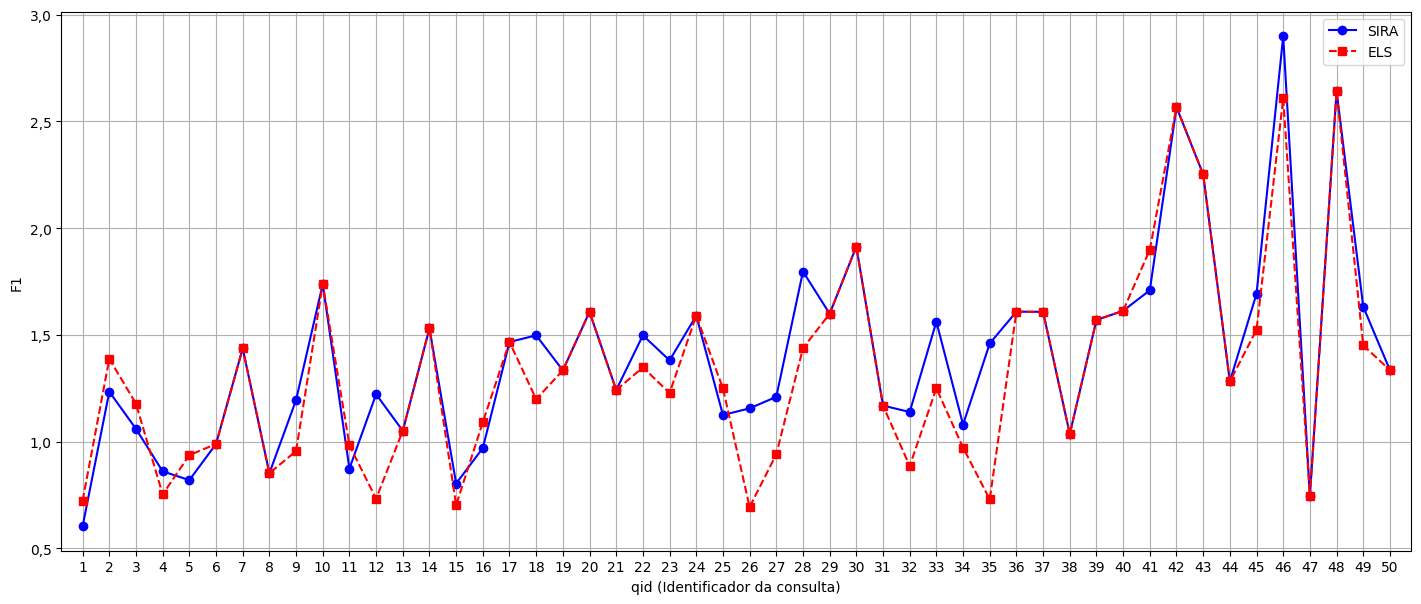

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nir = get_f_scores_data(sira_f_score)
els = get_f_scores_data(els_f_score)
list_qid = get_ids(sira_f_score["query_ids"])

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

# Formatar o eixo y para usar vírgulas como separador decimal
fmt = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x).replace('.',','))
ax.yaxis.set_major_formatter(fmt)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('F1')
ax.legend()
ax.grid(True)
# plt.show()

# Adjust x limits
ax.set_xlim(x_stick[0] - 0.8, x_stick[-1] + 0.8)  # Adjust these numbers according to your preference

# Adjust margins
plt.subplots_adjust(left=0.05, right=0.95)  # Adjust these numbers according to your preference

plt.savefig("pdf/trec_covid_f1.pdf", format="pdf")

## Avaliação DCG

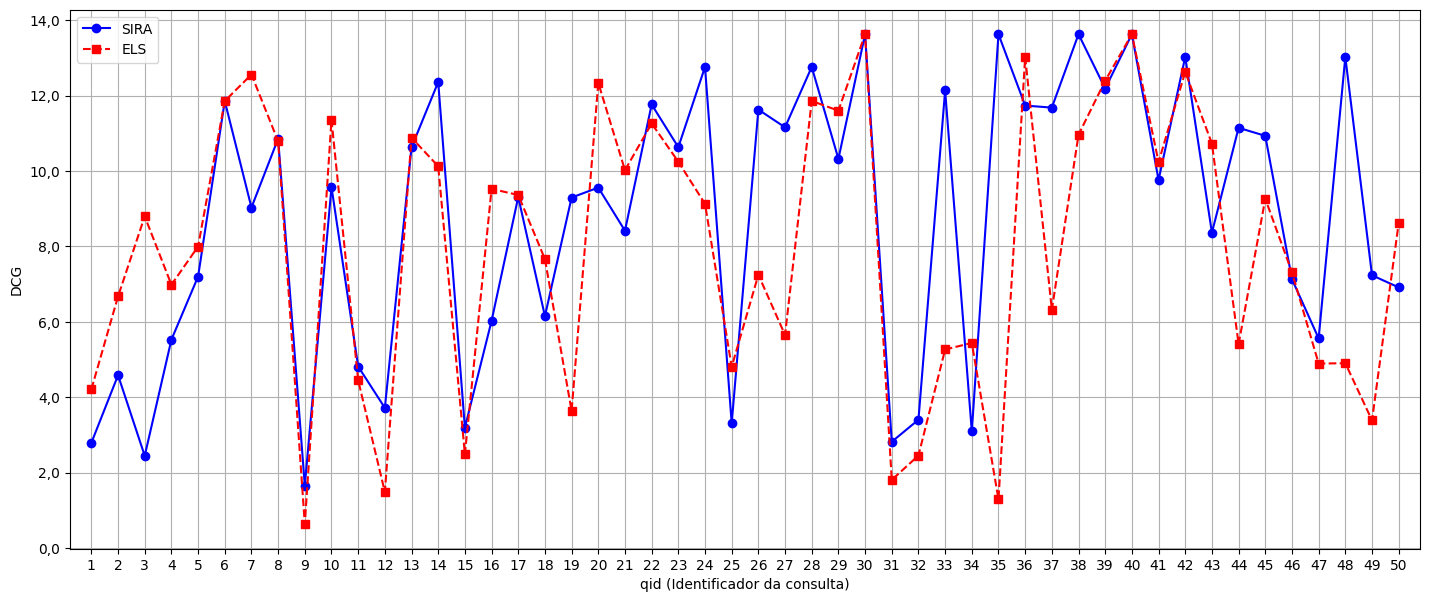

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nir = get_dcg_data(sira_ndcg)
els = get_dcg_data(els_ndcg)
list_qid = get_ids(sira_ndcg["query_ids"])

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

# Formatar o eixo y para usar vírgulas como separador decimal
fmt = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x).replace('.',','))
ax.yaxis.set_major_formatter(fmt)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('DCG')
ax.legend()
ax.grid(True)
# plt.show()

# Adjust x limits
ax.set_xlim(x_stick[0] - 0.8, x_stick[-1] + 0.8)  # Adjust these numbers according to your preference

# Adjust margins
plt.subplots_adjust(left=0.05, right=0.95)  # Adjust these numbers according to your preference

plt.savefig("pdf/trec_covid_dcg.pdf", format="pdf")

## Avaliação NDCG

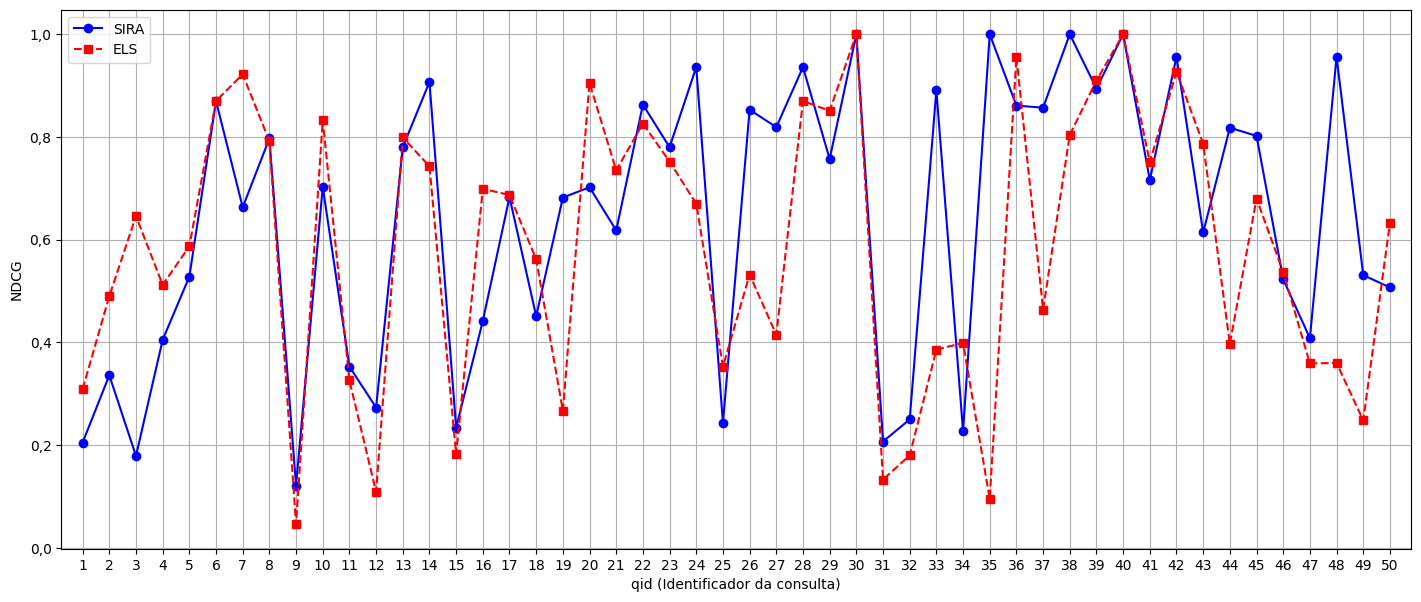

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nir = get_ndcg_data(sira_ndcg)
els = get_ndcg_data(els_ndcg)
list_qid = get_ids(sira_ndcg["query_ids"])

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)

# Format the y-axis to use commas as the decimal separator
fmt = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x).replace('.',','))
ax.yaxis.set_major_formatter(fmt)

# Add axis labels to plot
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('NDCG')
ax.legend()
ax.grid(True)

# Adicionar rótulos do eixo x com rotação de 45 graus
# plt.xticks(rotation=45)

# Adjust x limits
ax.set_xlim(x_stick[0] - 0.8, x_stick[-1] + 0.8)  # Adjust these numbers according to your preference

# Adjust margins
plt.subplots_adjust(left=0.05, right=0.95)  # Adjust these numbers according to your preference

# Save the figure
plt.savefig("pdf/trec_covid_ndcg.pdf", format="pdf")


# Analise dos dados

## Recall

In [38]:
import pandas as pd

els_df = pd.DataFrame(els_f_score)
sira_df = pd.DataFrame(sira_f_score)

els_values = greate_values(els_df["recall"].values, sira_df["recall"].values)
sira_values = greate_values(sira_df["recall"].values,els_df["recall"].values)
"ELS:", els_values, "SIRA", sira_values

('ELS:',
 [1, 2, 3, 5, 11, 16, 25, 41],
 'SIRA',
 [4, 9, 12, 15, 18, 22, 23, 26, 27, 28, 32, 33, 34, 35, 45, 46, 49])

In [52]:
import numpy as np

"ELS", np.mean(els_df["recall"].values), "SIRA", np.mean(sira_df["recall"].values)

('ELS', 0.006719975312000001, 'SIRA', 0.007084620892)

## Precisão

In [40]:
els_values = greate_values(els_df["precision"].values, sira_df["precision"].values)
sira_values = greate_values(sira_df["precision"].values,els_df["precision"].values)
"ELS:", els_values, "SIRA", sira_values

('ELS:',
 [1, 2, 3, 5, 11, 16, 25, 41],
 'SIRA',
 [4, 9, 12, 15, 18, 22, 23, 26, 27, 28, 32, 33, 34, 35, 45, 46, 49])

In [53]:
"ELS", np.mean(els_df["precision"].values), "SIRA", np.mean(sira_df["precision"].values)

('ELS', 0.868, 'SIRA', 0.9180000000000001)

## F1

In [42]:
els_values = greate_values(els_df["f_scores"].values, sira_df["f_scores"].values)
sira_values = greate_values(sira_df["f_scores"].values,els_df["f_scores"].values)
"ELS:", els_values, "SIRA", sira_values

('ELS:',
 [1, 2, 3, 5, 11, 16, 25, 41],
 'SIRA',
 [4, 9, 12, 15, 18, 22, 23, 26, 27, 28, 32, 33, 34, 35, 45, 46, 49])

In [54]:
"ELS", np.mean(els_df["f_scores"].values), "SIRA", np.mean(sira_df["f_scores"].values)

('ELS', 0.013328812834000002, 'SIRA', 0.014052502732)

## DCG

In [55]:
els_df = pd.DataFrame(els_ndcg)
sira_df = pd.DataFrame(sira_ndcg)

In [57]:
els_values = greate_values(els_df["dcg"].values, sira_df["dcg"].values)
sira_values = greate_values(sira_df["dcg"].values,els_df["dcg"].values)
"ELS:", els_values, "SIRA", sira_values

('ELS:',
 [1,
  2,
  3,
  4,
  5,
  7,
  10,
  13,
  16,
  17,
  18,
  20,
  21,
  25,
  29,
  34,
  36,
  39,
  41,
  43,
  46,
  50],
 'SIRA',
 [8,
  9,
  11,
  12,
  14,
  15,
  19,
  22,
  23,
  24,
  26,
  27,
  28,
  31,
  32,
  33,
  35,
  37,
  38,
  42,
  44,
  45,
  47,
  48,
  49])

In [58]:
"ELS", np.mean(els_df["dcg"].values), "SIRA", np.mean(sira_df["dcg"].values)

('ELS', 7.985907721759999, 'SIRA', 8.761457175562)

## NDCG

In [59]:
els_values = greate_values(els_df["ndcg"].values, sira_df["ndcg"].values)
sira_values = greate_values(sira_df["ndcg"].values,els_df["ndcg"].values)
"ELS:", els_values, "SIRA", sira_values

('ELS:',
 [1,
  2,
  3,
  4,
  5,
  7,
  10,
  13,
  16,
  17,
  18,
  20,
  21,
  25,
  29,
  34,
  36,
  39,
  41,
  43,
  46,
  50],
 'SIRA',
 [8,
  9,
  11,
  12,
  14,
  15,
  19,
  22,
  23,
  24,
  26,
  27,
  28,
  31,
  32,
  33,
  35,
  37,
  38,
  42,
  44,
  45,
  47,
  48,
  49])

In [60]:
"ELS", np.mean(els_df["ndcg"].values), "SIRA", np.mean(sira_df["ndcg"].values)

('ELS', 0.5858775119940001, 'SIRA', 0.642774861706)